In [22]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression, LogisticRegression

# Object Oriented Programming in Sklearn

In this extra lesson we will be digging a bit deeper into the `sklearn` library.  Our objective is not so much to learn about `sklearn`, but to explore how a professionaly developed, widely used library uses the organizational principles of object oriented programming to provide a good user experience.

The main theme of our explorations will be the power of **Providing a Consistent Interface**.  One of the fundamental commandments of OOP is:

> Program to an interface instead of an implementation.

Sklearn is a stellar example of this important programming philosophy.

## Regressors and Classifiers

The first interface we will explore is the **Regression/Classification Interface**.

**Regression** and **Classification** are two sides of the same coin.  The goal of both is **Predictive Modeling** (also called Supervised Learning, a less self explanatory term).

In a predictive modeling problem we have some data $X$ (often called the **predictors**) which we want to use to make a prediction of another measurement $y$ (often called the **response**).  For example:

  - Use the history of all board game ratings on [Board Game Geek]() ($X$) to predict the rating a user will give a new game ($y$).
  - Use the history of all customers of a car insurance company ($X$) to predict the likelihood of a new customer being involved in a car accident ($y$).
  - Predict which type of animal ($y$) appears in a black and white photo taken by a wildlife camera ($X$).
  - Predict whether a flight will be delayed and, if so, how delayed it will be.
  
The general theme is that:

> We **fit** a model to some data ($X, y$), and then use the model to **predict** given some new data.

Let's look at two examples.

### Regression: Linear Regression

Our first example is **linear regression**.  In linear regression we have data $X$, and our response is a **continuous** measurement.

The data set we will use to demonstrate linear regression contains measurements on a single species of insect captured on two continents.

In [3]:
insects = pd.read_csv('./insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


Suppose we want to predict an instects wing size given the other measurements we have.  Since wing size is a continuous measurement, linear regression is an appropriate way to approach this problem.

All **regression objects** are used in the same way in sklearn.

1\. Create a regression object of the appropriate type.

In [4]:
insects_regression = LinearRegression()

To unwind this a bit, `LinearRegression` is a **class**, and calling the calls with the notation `LinearRegression()` creates an **object** which is an **instance of the LinearRegression class**.

2\. Use the `fit` method on the regression object to train the model using your data.

In [5]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']
insects_regression.fit(X_insects, y_insects)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Above we trained a linear model to create an equation of the form:

$$ \text{WingSize} \approx a + b \times \text{Continent} + c \times \text{Latitude} + d \times \text{Sex} $$

When we used `fit`, the model used the data we supplied to compute the correct values of the numbers $a, b, c, d$.  We can now pull these numbers out of the model object.

In [7]:
print("a = {:2.2f}".format(insects_regression.intercept_))

a = 836.16


In [8]:
print("b, c, d = {}".format(insects_regression.coef_))

b, c, d = [ -4.12890383   1.79260932 -98.85714286]


3\. Use the `predict` method to compute predicted values your data (could be the data you used to train the model, or another dataset entirely.

In [11]:
wing_size_predictions = insects_regression.predict(X_insects)

Calling the `predict` method uses the equation to make predictions about wing size.  This is very useful if we had data on insects that we **didn't** know the wingsize of. 

For fun, let's plot the true data and the predicted data in two scatterplots.

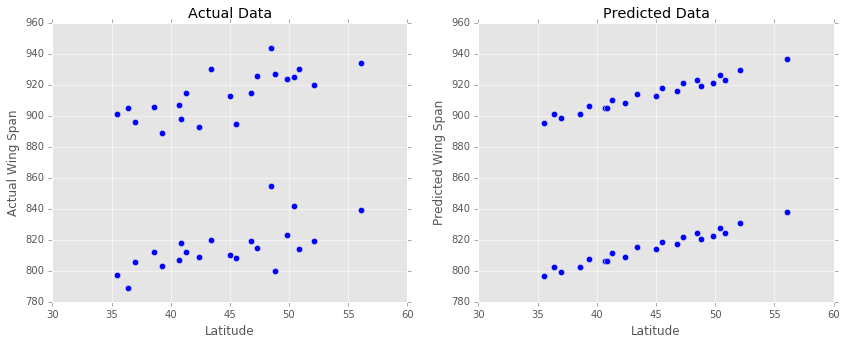

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

**Summary:** A `LinearRegression` uses the methods `fit` and `predict` to adapt itself to data, and to then make predictions.

### Classification: Logistic Regression

### Alltogether

## Transformers

## Combining Objects: Pipelines

## Combining Objects: FeatureUnion

## Creating Our Own Transformer